In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler




# m1


In [ ]:
import pandas as pd
import numpy as np

def preprocess_file(file_name, file_map):
    """
    Preprocess a CSV file and print detailed information about its contents.

    Parameters:
    file_name (str): Name of the CSV file to preprocess
    file_map (dict): Dictionary mapping file names to format and type
    """
    try:
        # Get format and type information
        format_type, data_type = file_map.get(file_name, ('Unknown', 'Unknown'))

        # Load the CSV file
        df = pd.read_csv(file_name)

        print(f"\n{'='*50}")
        print(f"PREPROCESSING FILE: {file_name}")
        print(f"FORMAT: {format_type} | TYPE: {data_type}")
        print(f"{'='*50}")

        # Display basic information
        print(f"\nBasic Information:")
        print(f"  - Shape: {df.shape}")
        print(f"  - Columns: {list(df.columns)}")

        # Show first 5 rows
        print("\nFirst 5 rows:")
        print(df.head())

        # Check for missing values
        print("\nMissing values per column:")
        print(df.isnull().sum())

        # Replace '-' with NaN and convert numeric columns
        for col in df.columns:
            if df[col].dtype == object:
                if df[col].astype(str).str.contains('-').any():
                    print(f"\nReplacing '-' with NaN in column: {col}")
                    df[col] = df[col].replace('-', np.nan)

        # Convert numeric columns where possible
        print("\nConverting columns to numeric where possible...")
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col], errors='ignore')
            except Exception as e:
                print(f"  - Could not convert column {col}: {e}")

        # Show data types after conversion
        print("\nData types after conversion:")
        print(df.dtypes)

        # Summary statistics for numeric columns
        print("\nSummary statistics for numeric columns:")
        print(df.describe())

        # Return the preprocessed dataframe


    except Exception as e:
        print(f"ERROR: Could not process {file_name}: {e}")


# Example usage:
# df = preprocess_file('test_international.csv', file_map)


In [ ]:
file_map = {
    # Test
    'test_international.csv':('Test', 'both'),
    'duleep_runs_test.csv': ('Test', 'bat'),
    'ranji_runs_test.csv': ('Test', 'bat'),
    'duleep_wickets_test.csv': ('Test', 'bowl'),
    'ranji_wickets_test.csv': ('Test', 'bowl'),
    # ODI
    'odi_international.csv': ('ODI', 'both'),
    'u23_runs_ODI.csv':('ODI', 'bat'),
    'u23_wickets_ODI.csv':('ODI', 'bowl'),
    'vijay_runs_ODI.csv': ('ODI', 'bat'),
    'vijay_wickets_ODI.csv': ('ODI', 'bowl'),
    'cooch_runs_ODI.csv': ('ODI', 'bat'),
    'cooch_wickets_ODI.csv': ('ODI', 'bowl'),
    # T20
    't20_international.csv': ('T20', 'both'),
    'mushtaq_runs_t20.csv': ('T20', 'bat'),
    'mushtaq_wickets_t20.csv': ('T20', 'bowl')
}




In [ ]:
preprocess_file('test_international.csv', file_map)


PREPROCESSING FILE: test_international.csv
FORMAT: Test | TYPE: both

Basic Information:
  - Shape: (31, 15)
  - Columns: ['Name', 'Known As', 'Born', 'Career', 'Matches', 'Inns', 'Runs', '100s', 'HS', 'Bat Avg', 'Wkts', '5W', 'Bowl Avg', 'E/R', 'Best']

First 5 rows:
           Name        Known As        Born Career  Matches  Inns  Runs  100s  \
0  A Akash Deep      Akash Deep  15/12/1996  2024-        7    10    83     0   
1    K S Bharat       KS Bharat  03/10/1993  2023-        7    12   221     0   
2    J J Bumrah  Jasprit Bumrah  06/12/1993  2018-       45    69   332     0   
3  Ishan Kishan    Ishan Kishan  18/07/1998  2023-        2     3    78     0   
4      S S Iyer    Shreyas Iyer  06/12/1994  2021-       14    24   811     1   

    HS  Bat Avg  Wkts  5W  Bowl Avg   E/R  Best  
0   31     8.30    15   0      35.2  3.60  3/83  
1   44    20.09     0   0       0.0  0.00   NaN  
2   34     7.06   205  13      19.4  2.77  6/27  
3   52    78.00     0   0       0.0  0.00  

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('duleep_runs_test.csv', file_map)


PREPROCESSING FILE: duleep_runs_test.csv
FORMAT: Test | TYPE: bat

Basic Information:
  - Shape: (67, 15)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'R', 'NO', 'HS', 'AVG', 'BF', 'SR', '100', '50', '4S', '6S']

First 5 rows:
   POS           PLAYER   TEAM  M  I    R NO    HS    AVG   BF     SR  100  \
0    1       Ricky Bhui  IND-D  3  6  359  1  119*  71.80  561  63.99    2   
1    2     A R Easwaran  IND-B  3  5  309  1  157*  77.25  553  55.87    2   
2    3   Shashwat Rawat  IND-A  2  4  256  1   124  85.33  424  60.37    1   
3    4      R D Gaikwad  IND-C  3  6  232  -    62  38.67  347  66.85    0   
4    5  B Sai Sudharsan  IND-C  3  6  211  -   111  35.17  397  53.14    1   

   50  4S  6S  
0   1  43   8  
1   0  31   2  
2   2  28   1  
3   2  34   3  
4   0  29   0  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
R         0
NO        0
HS        0
AVG       0
BF        0
SR        0
100       0
50        0
4S        0
6S     

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('ranji_runs_test.csv', file_map)


PREPROCESSING FILE: ranji_runs_test.csv
FORMAT: Test | TYPE: bat

Basic Information:
  - Shape: (100, 15)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'R', 'NO', 'HS', 'AVG', 'BF', 'SR', '100', '50', '4S', '6S']

First 5 rows:
   POS             PLAYER   TEAM   M   I    R NO    HS     AVG    BF     SR  \
0    1         Y V Rathod    VCA  10  18  960  -   151   53.33  1630  58.89   
1    2  Snehal Kauthankar  GOACA   6   7  949  2  314*  189.80  1323  71.73   
2    3     Shubham Sharma   MPCA   7  12  943  3   240  104.78  1451  64.98   
3    4     Tanmay Agarwal   HYCA   7  12  934  -   177   77.83  1619  57.68   
4    5        Agni Chopra    CAM   5   8  865  1  238*  123.57   987  87.63   

   100  50   4S  6S  
0    5   3   80   4  
1    3   2  100   4  
2    3   4   84  10  
3    4   2   81  11  
4    4   2  123   7  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
R         0
NO        0
HS        0
AVG       0
BF        0
SR        0
1

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('duleep_wickets_test.csv', file_map)


PREPROCESSING FILE: duleep_wickets_test.csv
FORMAT: Test | TYPE: bowl

Basic Information:
  - Shape: (42, 13)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'WKTS', 'R', 'BBI', 'AVG', 'ECON', 'SR', '4W', '5W']

First 5 rows:
   POS          PLAYER   TEAM  M  I  WKTS    R  BBI    AVG  ECON     SR  4W  \
0    1   Anshul Kamboj  IND-C  3  5    16  274    8  17.12  3.19  32.18   0   
1    2    Mukesh Kumar  IND-B  3  6    15  429    4  28.60  4.00  42.80   2   
2    3   Navdeep Saini  IND-B  3  6    14  356    5  25.42  3.84  39.64   0   
3    4  Arshdeep Singh  IND-D  3  6    13  273    6  21.00  3.23  38.92   0   
4    5        V Vyshak  IND-C  3  5    10  249    4  24.90  3.23  46.20   1   

   5W  
0   1  
1   0  
2   1  
3   1  
4   0  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
WKTS      0
R         0
BBI       0
AVG       0
ECON      0
SR        0
4W        0
5W        0
dtype: int64

Replacing '-' with NaN in column: TEAM

Replacing '

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('ranji_wickets_test.csv', file_map)


PREPROCESSING FILE: ranji_wickets_test.csv
FORMAT: Test | TYPE: bowl

Basic Information:
  - Shape: (100, 13)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'WKTS', 'R', 'BBI', 'AVG', 'ECON', 'SR', '4W', '5W']

First 5 rows:
   POS        PLAYER  TEAM   M   I  WKTS     R  BBI    AVG  ECON     SR  4W  \
0    1   Harsh Dubey   VCA  10  19    69  1172    6  16.98  2.66  38.17   3   
1    2    Auqib Nabi  JKCA   8  15    44   613    6  13.93  2.74  30.47   2   
2    3  Shams Mulani   MCA   9  18    44  1035    6  23.52  2.97  47.40   1   
3    4     Suchith J   NCA   6  11    43   695    6  16.16  2.39  40.51   3   
4    5    D A Jadeja   SCA   8  13    40   834    6  20.85  2.98  41.97   2   

   5W  
0   7  
1   6  
2   3  
3   4  
4   3  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
WKTS      0
R         0
BBI       0
AVG       0
ECON      0
SR        0
4W        0
5W        0
dtype: int64

Converting columns to numeric where possible...

Da

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('odi_international.csv', file_map)


PREPROCESSING FILE: odi_international.csv
FORMAT: ODI | TYPE: both

Basic Information:
  - Shape: (37, 15)
  - Columns: ['Name', 'Known As', 'Born', 'Career', 'Matches', 'Inns', 'Runs', '100s', 'HS', 'Bat Avg', 'Wkts', '4W', 'Bowl Avg', 'E/R', 'Best']

First 5 rows:
             Name          Known As        Born Career  Matches  Inns  Runs  \
0  Arshdeep Singh    Arshdeep Singh  05/02/1999  2022-        9     6    39   
1      Avesh Khan        Avesh Khan  13/12/1996  2022-        8     4    23   
2      J J Bumrah    Jasprit Bumrah  06/12/1993  2016-       89    26    91   
3      Y S Chahal  Yuzvendra Chahal  23/07/1990  2016-       72    14    77   
4      D L Chahar     Deepak Chahar  07/08/1992  2018-       13     9   203   

   100s  HS  Bat Avg  Wkts  4W  Bowl Avg   E/R  Best  
0     0  18     7.80    14   2     23.00  5.18  5/37  
1     0  10     7.67     9   1     36.56  5.54  4/27  
2     0  16     7.58   149   8     23.55  4.60  6/19  
3     0  18     8.56   121   7     27

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('u23_runs_ODI.csv', file_map)


PREPROCESSING FILE: u23_runs_ODI.csv
FORMAT: ODI | TYPE: bat

Basic Information:
  - Shape: (100, 15)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'R', 'NO', 'HS', 'AVG', 'BF', 'SR', '100', '50', '4S', '6S']

First 5 rows:
   POS             PLAYER  TEAM  M  I    R NO    HS     AVG   BF      SR  100  \
0    1         Arsh Ranga   HCA  9  9  840  2   230  120.00  588  142.85    4   
1    2       Sameer Rizvi  UPCA  6  6  728  3  202*  242.67  422  172.51    4   
2    3         Himateja K  HYCA  6  6  625  2  164*  156.25  499  125.25    3   
3    4  Yashvardhan Dalal   HCA  9  9  582  2   165   83.14  479  121.50    3   
4    5           Gsp Teja   ACA  9  9  576  1   152   72.00  615   93.65    2   

   50  4S  6S  
0   3  69  51  
1   0  52  62  
2   3  67  18  
3   2  59  26  
4   4  57   6  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
R         0
NO        0
HS        0
AVG       0
BF        0
SR        0
100       0
50        0
4S   

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('u23_wickets_ODI.csv', file_map)


PREPROCESSING FILE: u23_wickets_ODI.csv
FORMAT: ODI | TYPE: bowl

Basic Information:
  - Shape: (100, 13)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'WKTS', 'R', 'BBI', 'AVG', 'ECON', 'SR', '4W', '5W']

First 5 rows:
   POS          PLAYER  TEAM  M  I  WKTS    R  BBI    AVG  ECON     SR  4W  5W
0    1          Aniket  HPCA  9  9    25  410    4  16.40  5.56  17.68   3   0
1    2   Piyush Dahiya   HCA  9  9    23  411    4  17.86  5.23  20.47   3   0
2    3  Rounak Waghela  DDCA  7  7    22  225    8  10.22  3.58  17.13   0   2
3    4    Anuj Thakral   HCA  9  9    20  415    4  20.75  5.46  22.80   2   0
4    5    Jay Malusare  GUCA  8  8    19  386    4  20.31  5.58  21.84   1   0

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
WKTS      0
R         0
BBI       0
AVG       0
ECON      0
SR        0
4W        0
5W        0
dtype: int64

Converting columns to numeric where possible...

Data types after conversion:
POS         int64
PLAYER  

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('vijay_runs_ODI.csv', file_map)


PREPROCESSING FILE: vijay_runs_ODI.csv
FORMAT: ODI | TYPE: bat

Basic Information:
  - Shape: (100, 15)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'R', 'NO', 'HS', 'AVG', 'BF', 'SR', '100', '50', '4S', '6S']

First 5 rows:
   POS             PLAYER  TEAM   M   I    R NO    HS     AVG   BF      SR  \
0    1         Karun Nair   VCA   9   8  779  6  163*  389.50  628  124.04   
1    2    Mayank Agarawal  KSCA  10  10  651  3  139*   93.00  605  107.60   
2    3           S A Veer  MHCA   9   9  520  3   155   86.67  523   99.42   
3    4  Prabhsimran Singh   PCA   8   8  498  2  150*   83.00  387  128.68   
4    5       Dhruv Shorey   VCA   8   8  494  1  118*   70.57  533   92.68   

   100  50  4S  6S  
0    5   1  93  16  
1    4   1  72  18  
2    2   2  58  12  
3    3   0  53  24  
4    3   1  56   8  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
R         0
NO        0
HS        0
AVG       0
BF        0
SR        0
100       0
50 

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('vijay_wickets_ODI.csv', file_map)


PREPROCESSING FILE: vijay_wickets_ODI.csv
FORMAT: ODI | TYPE: bowl

Basic Information:
  - Shape: (100, 13)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'WKTS', 'R', 'BBI', 'AVG', 'ECON', 'SR', '4W', '5W']

First 5 rows:
   POS           PLAYER  TEAM   M   I  WKTS    R  BBI    AVG  ECON     SR  4W  \
0    1   Arshdeep Singh   PCA   7   7    20  365    5  18.25  5.62  19.45   2   
1    2            Varun  TNCA   7   6    18  219    5  12.16  4.36  16.72   0   
2    3        Koushik V  KSCA  10  10    18  440    5  24.44  4.52  32.44   1   
3    4    Shreyas Gopal  KSCA  10  10    18  491    4  27.27  4.98  32.83   2   
4    5  Abhilash Shetty  KSCA   7   7    17  307    5  18.05  5.18  20.88   1   

   5W  
0   1  
1   2  
2   1  
3   0  
4   1  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
WKTS      0
R         0
BBI       0
AVG       0
ECON      0
SR        0
4W        0
5W        0
dtype: int64

Converting columns to numeric where possi

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('cooch_runs_ODI.csv', file_map)


PREPROCESSING FILE: cooch_runs_ODI.csv
FORMAT: ODI | TYPE: bat

Basic Information:
  - Shape: (100, 15)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'R', 'NO', 'HS', 'AVG', 'BF', 'SR', '100', '50', '4S', '6S']

First 5 rows:
   POS               PLAYER  TEAM  M   I    R NO   HS     AVG    BF     SR  \
0    1       Nitya J Pandya   BCA  6   8  881  -  265  110.13  1182  74.53   
1    2              Ragavan   CAP  6   9  782  -  232   86.89  1221  64.04   
2    3  Rudra Pritesh Patel  GUCA  8  13  757  2  208   68.82  1091  69.38   
3    4          Prithvi Raj  BICA  5   9  734  1  163   91.75   904  81.19   
4    5          Smit Rathva   BCA  6   8  733  -  215   91.63  1104  66.39   

   100  50   4S  6S  
0    4   0  124   8  
1    4   0   80  23  
2    3   2   88   7  
3    3   3  104  11  
4    3   2  100   6  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
R         0
NO        0
HS        0
AVG       0
BF        0
SR        0
100      

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
preprocess_file('cooch_wickets_ODI.csv', file_map)

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead




PREPROCESSING FILE: cooch_wickets_ODI.csv
FORMAT: ODI | TYPE: bowl

Basic Information:
  - Shape: (100, 13)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'WKTS', 'R', 'BBI', 'AVG', 'ECON', 'SR', '4W', '5W']

First 5 rows:
   POS          PLAYER  TEAM  M   I  WKTS    R  BBI    AVG  ECON     SR  4W  \
0    1  Hemchudeshan J  TNCA  8  15    47  716    5  15.23  2.61  34.89   4   
1    2  Khilan A Patel  GUCA  8  15    45  984    6  21.86  2.88  45.53   1   
2    3     Arkajit Roy   TCA  6  11    38  379    6   9.97  2.39  25.02   2   
3    4     Akshu Bajwa  UPCA  8  15    38  759    8  19.97  2.80  42.71   1   
4    5      Bk Kishore  TNCA  9  17    38  784    5  20.63  2.85  43.36   3   

   5W  
0   3  
1   5  
2   4  
3   3  
4   2  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
WKTS      0
R         0
BBI       0
AVG       0
ECON      0
SR        0
4W        0
5W        0
dtype: int64

Converting columns to numeric where possible...

Data

In [ ]:
preprocess_file('t20_international.csv', file_map)


PREPROCESSING FILE: t20_international.csv
FORMAT: T20 | TYPE: both

Basic Information:
  - Shape: (50, 15)
  - Columns: ['Name', 'Known As', 'Born', 'Career', 'Matches', 'Inns', 'Runs', '100s', 'HS', 'Bat Avg', 'Wkts', '4W', 'Bowl Avg', 'E/R', 'Best']

First 5 rows:
              Name         Known As        Born Career  Matches  Inns  Runs  \
0  Abhishek Sharma  Abhishek Sharma  04/09/2000  2024-       17    16   535   
1        K K Ahmed    Khaleel Ahmed  05/12/1997  2018-       18     2     1   
2   Arshdeep Singh   Arshdeep Singh  05/02/1999  2022-       63    21    71   
3       Avesh Khan       Avesh Khan  13/12/1996  2022-       25     5    27   
4       J J Bumrah   Jasprit Bumrah  06/12/1993  2016-       70     8     8   

   100s   HS  Bat Avg  Wkts  4W  Bowl Avg   E/R  Best  
0     2  135    33.44     6   0     25.50  8.05   2/3  
1     0    1     0.00    16   0     35.13  8.52  2/27  
2     0   12     8.88    99   2     18.30  8.30   4/9  
3     0   16    13.50    27   1  

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



          Matches        Inns         Runs       100s          HS    Bat Avg  \
count   50.000000   50.000000    50.000000  50.000000   50.000000  50.000000   
mean    36.660000   23.200000   531.400000   0.460000   47.000000  18.530800   
std     35.678616   31.677585   952.809551   1.073046   44.894889  14.873762   
min      1.000000    0.000000     0.000000   0.000000    0.000000   0.000000   
25%      9.000000    3.000000     9.000000   0.000000    7.000000   4.250000   
50%     25.000000    9.000000    83.500000   0.000000   32.500000  16.335000   
75%     57.750000   25.500000   619.250000   0.000000   74.000000  30.607500   
max    159.000000  151.000000  4231.000000   5.000000  135.000000  49.930000   

            Wkts         4W    Bowl Avg        E/R  
count  50.000000  50.000000   50.000000  50.000000  
mean   21.240000   0.540000   18.949000   6.511200  
std    30.631157   1.073046   18.757599   3.950907  
min     0.000000   0.000000    0.000000   0.000000  
25%     0.2500

In [ ]:
preprocess_file('mushtaq_runs_t20.csv', file_map)


PREPROCESSING FILE: mushtaq_runs_t20.csv
FORMAT: T20 | TYPE: bat

Basic Information:
  - Shape: (100, 15)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'R', 'NO', 'HS', 'AVG', 'BF', 'SR', '100', '50', '4S', '6S']

First 5 rows:
   POS          PLAYER  TEAM   M  I    R NO    HS    AVG   BF      SR  100  \
0    1  Ajinkya Rahane   MCA   9  8  469  -    98  58.63  285  164.56    0   
1    2   Rajat Patidar  MPCA  10  9  428  2   81*  61.14  230  186.08    0   
2    3          S Gani  BICA   7  7  353  1  120*  58.83  248  142.33    1   
3    4    Shreyas Iyer   MCA   9  8  345  1  130*  49.29  183  188.52    1   
4    5       Karan Lal   CAB   9  9  338  1   94*  42.25  209  161.72    0   

   50  4S  6S  
0   5  46  19  
1   5  32  31  
2   2  41  10  
3   1  31  22  
4   2  35  18  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
R         0
NO        0
HS        0
AVG       0
BF        0
SR        0
100       0
50        0
4S        0
6S     

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



              POS          M           I           R         NO         AVG  \
count  100.000000  100.00000  100.000000  100.000000  68.000000  100.000000   
mean    50.500000    7.10000    6.660000  212.330000   1.779412   42.078300   
std     29.011492    1.32954    1.342544   65.975823   1.034417   16.348953   
min      1.000000    4.00000    4.000000  137.000000   1.000000   20.560000   
25%     25.750000    6.00000    6.000000  168.000000   1.000000   30.367500   
50%     50.500000    7.00000    6.500000  191.500000   1.000000   37.175000   
75%     75.250000    8.00000    7.250000  244.500000   2.250000   49.260000   
max    100.000000   10.00000   10.000000  469.000000   5.000000   86.500000   

              BF          SR         100          50          4S          6S  
count  100.00000  100.000000  100.000000  100.000000  100.000000  100.000000  
mean   137.06000  156.321800    0.140000    1.520000   19.140000   11.040000  
std     40.59577   22.828816    0.376588    0.95853

In [ ]:
preprocess_file('mushtaq_wickets_t20.csv', file_map)

<ipython-input-102-858261cd2ebb>:48: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead




PREPROCESSING FILE: mushtaq_wickets_t20.csv
FORMAT: T20 | TYPE: bowl

Basic Information:
  - Shape: (100, 13)
  - Columns: ['POS', 'PLAYER', 'TEAM', 'M', 'I', 'WKTS', 'R', 'BBI', 'AVG', 'ECON', 'SR', '4W', '5W']

First 5 rows:
   POS                 PLAYER  TEAM   M   I  WKTS    R  BBI    AVG   ECON  \
0    1    Jagjit Singh Sandhu  UTCA   7   7    18  229    5  12.72   8.48   
1    2  Kumar Kartikeya Singh  MPCA  10  10    17  290    3  17.05   7.63   
2    3          M G Choudhary  MHCA   6   6    15  194    4  12.93   8.81   
3    4         Shardul Thakur   MCA   9   9    15  368    4  24.53  10.51   
4    5          Shreyas Gopal  KSCA   7   7    14  166    5  11.85   6.14   

      SR  4W  5W  
0   9.00   1   1  
1  13.41   0   0  
2   8.80   1   0  
3  14.00   1   0  
4  11.57   1   1  

Missing values per column:
POS       0
PLAYER    0
TEAM      0
M         0
I         0
WKTS      0
R         0
BBI       0
AVG       0
ECON      0
SR        0
4W        0
5W        0
dtype: int6

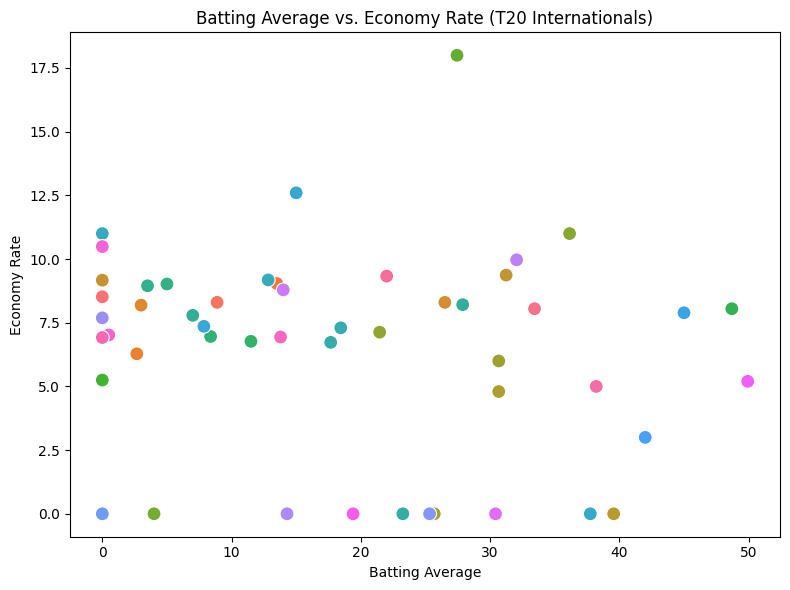

<Figure size 1000x600 with 0 Axes>

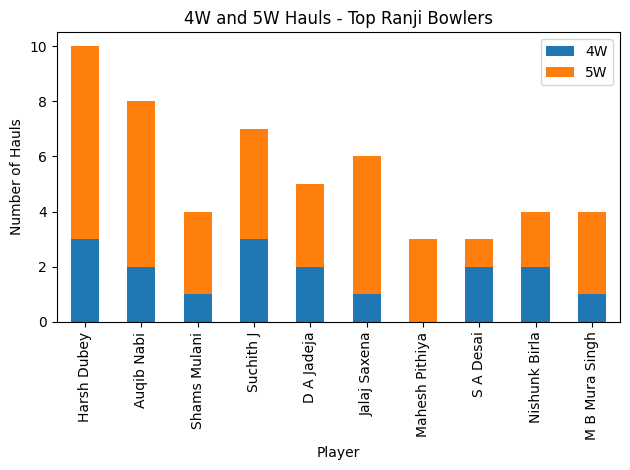

<ipython-input-119-16ca94d516a7>:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




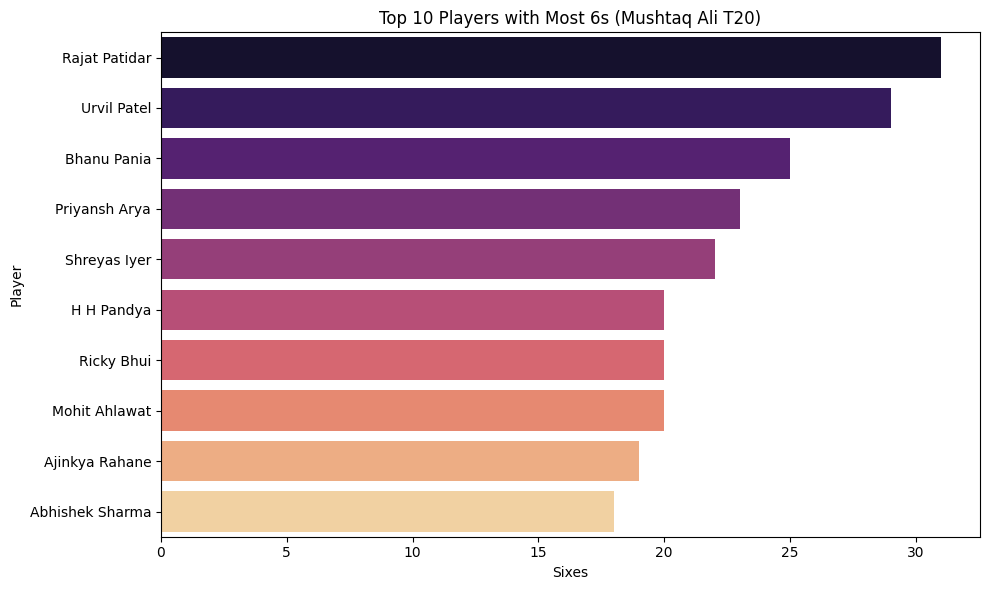

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Strike Rate vs Bat Avg for T20 Internationals
df = pd.read_csv('t20_international.csv')
plt.figure(figsize=(8,6))
sns.scatterplot(x='Bat Avg', y='E/R', data=df, hue='Name', s=100)
plt.title('Batting Average vs. Economy Rate (T20 Internationals)')
plt.xlabel('Batting Average')
plt.ylabel('Economy Rate')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# Example: 4W and 5W Hauls in Ranji Wickets
df = pd.read_csv('ranji_wickets_test.csv')
top_bowlers = df.sort_values('WKTS', ascending=False).head(10)
plt.figure(figsize=(10,6))
top_bowlers.set_index('PLAYER')[['4W', '5W']].plot(kind='bar', stacked=True)
plt.title('4W and 5W Hauls - Top Ranji Bowlers')
plt.ylabel('Number of Hauls')
plt.xlabel('Player')
plt.tight_layout()
plt.show()

# Example: Most 6s in Mushtaq Runs T20
df = pd.read_csv('mushtaq_runs_t20.csv')
top_6s = df.sort_values('6S', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='6S', y='PLAYER', data=top_6s, palette='magma')
plt.title('Top 10 Players with Most 6s (Mushtaq Ali T20)')
plt.xlabel('Sixes')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

# Load datasets
t20_intl = pd.read_csv('t20_international.csv')
ranji_wickets = pd.read_csv('ranji_wickets_test.csv')
odi_intl = pd.read_csv('odi_international.csv')
mushtaq_wickets = pd.read_csv('mushtaq_wickets_t20.csv')
ranji_runs = pd.read_csv('ranji_runs_test.csv')

# 1. Top 10 Wicket Takers in T20 Internationals
def plot_t20_top_wicket_takers():
    # Filter non-zero wicket takers and sort
    bowlers = t20_intl[t20_intl['Wkts'] > 0].sort_values('Wkts', ascending=False).head(10)

    fig = px.bar(
        bowlers,
        x='Wkts',
        y='Known As',
        color='Wkts',
        color_continuous_scale='Reds',
        title='Top 10 Wicket Takers - T20 International',
        labels={'Wkts': 'Wickets', 'Known As': 'Player'},
        orientation='h'
    )
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    fig.show()

plot_t20_top_wicket_takers()

In [ ]:

# 2. Top 10 Run Scorers in T20 Internationals
def plot_t20_top_run_scorers():
    # Sort by runs and select top 10
    batsmen = t20_intl.sort_values('Runs', ascending=False).head(10)

    fig = px.bar(
        batsmen,
        x='Runs',
        y='Known As',
        color='Runs',
        color_continuous_scale='Blues',
        title='Top 10 Run Scorers - T20 International',
        labels={'Runs': 'Runs', 'Known As': 'Player'},
        orientation='h'
    )
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    fig.show()

plot_t20_top_run_scorers()

In [ ]:
# 3. Batting Average vs Strike Rate in Ranji Trophy
def plot_ranji_avg_vs_sr():
    # Filter players with minimum 300 runs
    qualified = ranji_runs[ranji_runs['R'] > 300].head(30)

    fig = px.scatter(
        qualified,
        x='AVG',
        y='SR',
        color='R',
        size='R',
        hover_name='PLAYER',
        text='PLAYER',
        title='Batting Average vs Strike Rate in Ranji Trophy (Min. 300 Runs)',
        labels={'AVG': 'Batting Average', 'SR': 'Strike Rate', 'R': 'Total Runs'}
    )
    fig.update_traces(textposition='top center', marker=dict(opacity=0.7))
    fig.update_layout(showlegend=False)
    fig.show()

plot_ranji_avg_vs_sr()

In [ ]:
# 4. Bowling Economy vs Average in Mushtaq Ali Trophy
def plot_mushtaq_economy_vs_avg():
    # Filter bowlers with minimum 10 wickets
    qualified = mushtaq_wickets[mushtaq_wickets['WKTS'] >= 10].head(30)

    fig = px.scatter(
        qualified,
        x='ECON',
        y='AVG',
        color='WKTS',
        size='WKTS',
        hover_name='PLAYER',
        text='PLAYER',
        title='Bowling Economy vs Average in Mushtaq Ali Trophy (Min. 10 Wickets)',
        labels={'ECON': 'Economy Rate', 'AVG': 'Bowling Average', 'WKTS': 'Wickets'}
    )
    fig.update_traces(textposition='top center', marker=dict(opacity=0.7))
    fig.update_layout(showlegend=False)
    fig.show()

plot_mushtaq_economy_vs_avg()

In [ ]:
# 5. Distribution of 4W/5W Hauls in Ranji Trophy
def plot_ranji_4w5w_distribution():
    # Top 15 wicket-takers
    top_bowlers = ranji_wickets.sort_values('WKTS', ascending=False).head(15)

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=top_bowlers['PLAYER'],
        y=top_bowlers['4W'],
        name='4 Wicket Hauls',
        marker_color='indianred'
    ))
    fig.add_trace(go.Bar(
        x=top_bowlers['PLAYER'],
        y=top_bowlers['5W'],
        name='5 Wicket Hauls',
        marker_color='darkred'
    ))

    fig.update_layout(
        title='4W/5W Hauls Distribution - Top 15 Bowlers in Ranji Trophy',
        xaxis_title='Player',
        yaxis_title='Number of Hauls',
        barmode='group'
    )
    fig.show()

plot_ranji_4w5w_distribution()

In [ ]:
# 6. Format Comparison for Top All-rounders (if applicable)
def plot_allrounder_comparison():
    # Try to identify all-rounders from t20_intl data
    # Players with both runs and wickets
    allrounders = t20_intl[(t20_intl['Runs'] > 200) & (t20_intl['Wkts'] > 10)]

    if len(allrounders) > 0:
        fig = px.scatter(
            allrounders,
            x='Runs',
            y='Wkts',
            size='Matches',
            color='Bat Avg',
            hover_name='Known As',
            text='Known As',
            title='All-rounders in T20 Internationals',
            labels={'Runs': 'Total Runs', 'Wkts': 'Total Wickets', 'Matches': 'Matches Played'}
        )
        fig.update_traces(textposition='top center', marker=dict(opacity=0.7))
        fig.show()

    else:
        print("No all-rounders found in T20 Internationals.")

plot_allrounder_comparison()

In [ ]:
# --- File mapping and features ---
file_map = {
    # Test
    'test_international.csv':('Test', 'both'),
    'duleep_runs_test.csv': ('Test', 'bat'),
    'ranji_runs_test.csv': ('Test', 'bat'),
    'duleep_wickets_test.csv': ('Test', 'bowl'),
    'ranji_wickets_test.csv': ('Test', 'bowl'),
    # ODI
    'odi_international.csv': ('ODI', 'both'),
    'u23_runs_ODI.csv':('ODI', 'bat'),
    'u23_wickets_ODI.csv':('ODI', 'bowl'),
    'vijay_runs_ODI.csv': ('ODI', 'bat'),
    'vijay_wickets_ODI.csv': ('ODI', 'bowl'),
    'cooch_runs_ODI.csv': ('ODI', 'bat'),
    'cooch_wickets_ODI.csv': ('ODI', 'bowl'),
    # T20
    't20_international.csv': ('T20', 'both'),
    'mushtaq_runs_t20.csv': ('T20', 'bat'),
    'mushtaq_wickets_t20.csv': ('T20', 'bowl')
}


bat_features = ['R', 'AVG', '100', '50']
bowl_features = ['WKTS', 'AVG', 'ECON', 'SR', '4W', '5W']

def safe_numeric(col):
    """Convert column to numeric, replace '-', missing, or bad values with 0."""
    return pd.to_numeric(col.replace('-', np.nan), errors='coerce').fillna(0)

def load_and_prepare_data():
    all_data = []
    for file, (fmt, typ) in file_map.items():
        try:
            df = pd.read_csv(file)
        except Exception as e:
            print(f"Could not load {file}: {e}")
            continue
        df['Format'] = fmt
        df['Type'] = typ
        df['Source'] = file

        # Standardize and clean batting columns
        if typ == 'bat' or typ == 'both':
            # Try to map to standard batting columns
            bat_map = {
                'PLAYER': ['PLAYER', 'Name', 'Known As'],
                'R': ['R', 'Runs'],
                'AVG': ['AVG', 'Bat Avg'],
                '100': ['100', '100s'],
                '50': ['50', '50s'],
                '4S': ['4S'],
                '6S': ['6S']
            }
            bdf = pd.DataFrame()
            for std_col, options in bat_map.items():
                for opt in options:
                    if opt in df.columns:
                        bdf[std_col] = df[opt]
                        break
                else:
                    bdf[std_col] = 0
            bdf['Format'] = fmt
            bdf['Type'] = 'bat'
            bdf['Source'] = file
            for col in bat_features:
                bdf[col] = safe_numeric(bdf[col])
            bdf['PLAYER'] = bdf['PLAYER'].astype(str)
            all_data.append(bdf)

        # Standardize and clean bowling columns
        if typ == 'bowl' or typ == 'both':
            bowl_map = {
                'PLAYER': ['PLAYER', 'Name', 'Known As'],
                'WKTS': ['WKTS', 'Wkts'],
                'AVG': ['AVG', 'Bowl Avg'],
                'ECON': ['ECON', 'E/R'],
                'SR': ['SR'],
                '4W': ['4W'],
                '5W': ['5W']
            }
            bdf = pd.DataFrame()
            for std_col, options in bowl_map.items():
                for opt in options:
                    if opt in df.columns:
                        bdf[std_col] = df[opt]
                        break
                else:
                    bdf[std_col] = 0
            bdf['Format'] = fmt
            bdf['Type'] = 'bowl'
            bdf['Source'] = file
            for col in bowl_features:
                bdf[col] = safe_numeric(bdf[col])
            bdf['PLAYER'] = bdf['PLAYER'].astype(str)
            all_data.append(bdf)
    if not all_data:
        raise ValueError("No data loaded. Please check your CSV files.")
    return pd.concat(all_data, ignore_index=True)

def train_and_predict(format_type, top_n=10):
    data = load_and_prepare_data()
    data = data[data['Format'] == format_type]

    # Batting
    bat_data = data[data['Type'] == 'bat'].copy()
    bat_data = bat_data.dropna(subset=['PLAYER'])
    X_bat = bat_data[bat_features].fillna(0)
    y_bat = bat_data['R'].fillna(0)
    if len(X_bat) > 5:
        scaler_bat = StandardScaler()
        X_bat_scaled = scaler_bat.fit_transform(X_bat)
        model_bat = RandomForestRegressor(n_estimators=100, random_state=42)
        model_bat.fit(X_bat_scaled, y_bat)
        bat_data['Predicted'] = model_bat.predict(X_bat_scaled)
        top_bat = bat_data[['PLAYER', 'Predicted']].sort_values('Predicted', ascending=False).head(top_n)
    else:
        top_bat = bat_data[['PLAYER', 'R']].sort_values('R', ascending=False).head(top_n).rename(columns={'R': 'Predicted'})

    # Bowling
    bowl_data = data[data['Type'] == 'bowl'].copy()
    bowl_data = bowl_data.dropna(subset=['PLAYER'])
    X_bowl = bowl_data[bowl_features].fillna(0)
    y_bowl = bowl_data['WKTS'].fillna(0)
    if len(X_bowl) > 5:
        scaler_bowl = StandardScaler()
        X_bowl_scaled = scaler_bowl.fit_transform(X_bowl)
        model_bowl = RandomForestRegressor(n_estimators=100, random_state=42)
        model_bowl.fit(X_bowl_scaled, y_bowl)
        bowl_data['Predicted'] = model_bowl.predict(X_bowl_scaled)
        top_bowl = bowl_data[['PLAYER', 'Predicted']].sort_values('Predicted', ascending=False).head(top_n)
    else:
        top_bowl = bowl_data[['PLAYER', 'WKTS']].sort_values('WKTS', ascending=False).head(top_n).rename(columns={'WKTS': 'Predicted'})

    print(f"\nTop {top_n} Batters for {format_type}:")
    print(top_bat.to_string(index=False))
    print(f"\nTop {top_n} Bowlers for {format_type}:")
    print(top_bowl.to_string(index=False))

# Example usage:
train_and_predict('Test', top_n=10)  # For Test
train_and_predict('ODI', top_n=10)   # For ODI
train_and_predict('T20', top_n=10)   # For T20



Top 10 Batters for Test:
       PLAYER  Predicted
      V Kohli    8242.85
   C A Pujara    6943.47
   A M Rahane    4646.20
   R G Sharma    4246.77
    K L Rahul    3187.92
   R A Jadeja    2984.75
     R R Pant    2933.86
 Shubman Gill    1809.84
Y B K Jaiswal    1708.21
   Y V Rathod     949.87

Top 10 Bowlers for Test:
        PLAYER  Predicted
    R A Jadeja     276.81
    J J Bumrah     219.57
Mohammed Shami     208.33
     U T Yadav     177.06
Mohammed Siraj      85.82
   Harsh Dubey      65.18
 Kuldeep Yadav      54.09
     A R Patel      54.08
    Auqib Nabi      47.03
     Suchith J      43.92

Top 10 Batters for ODI:
        PLAYER  Predicted
       V Kohli   10794.58
    R G Sharma    9860.55
     K L Rahul    2927.19
  Shubman Gill    2803.78
      S S Iyer    2786.74
    R A Jadeja    2593.67
    H H Pandya    2184.13
  Ishan Kishan     904.42
      R R Pant     878.38
Nitya J Pandya     873.33

Top 10 Bowlers for ODI:
        PLAYER  Predicted
    R A Jadeja     203.51